In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1meerXVZ9kgS068PO73X5Tbq9YqClR4Ho/view?usp=sharing'
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Iris.csv') 
 
dataset = pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
dataset = dataset.drop(labels='Id', axis=1)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 6.0 MB/s 
     |████████████████████████████████| 366 kB 39.3 MB/s 
     |████████████████████████████████| 11.1 MB 32.8 MB/s 
     |████████████████████████████████| 50 kB 7.1 MB/s 
     |████████████████████████████████| 95 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 42.2 MB/s 
     |████████████████████████████████| 749 kB 64.8 MB/s 
     |████████████████████████████████| 1.5 MB 45.1 MB/s 
     |████████████████████████████████| 943 kB 71.0 MB/s 
     |████████████████████████████████| 133 kB 46.2 MB/s 
     |████████████████████████████████| 78 kB 7.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 965 kB 54.1 MB/s 
     |████████████████████████████████| 1.0 MB 70.5 MB/s 
     |█████████████████████

In [ ]:
#export a report
from dataprep.eda import create_report
report = create_report(dataset, title='My Report')

My Report
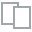
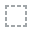
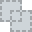
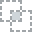
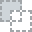
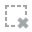
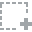
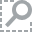
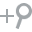
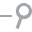
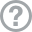
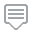
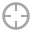
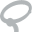
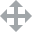
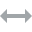
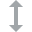
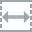
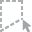
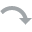
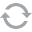
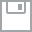
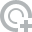
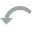
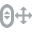
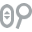
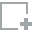
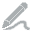
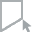
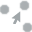
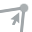
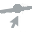

In [ ]:
#display the report
display(report)

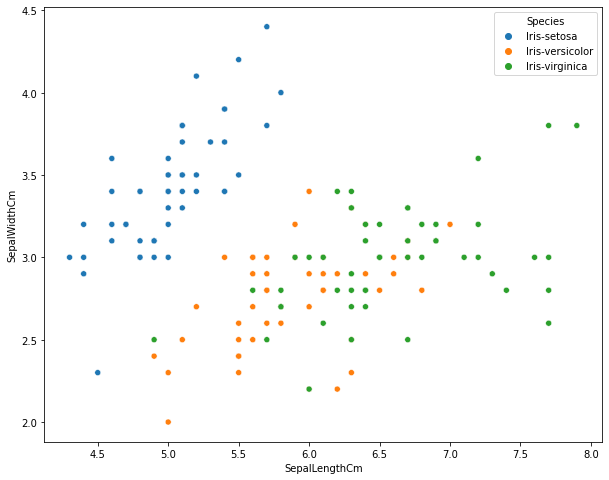

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = dataset)

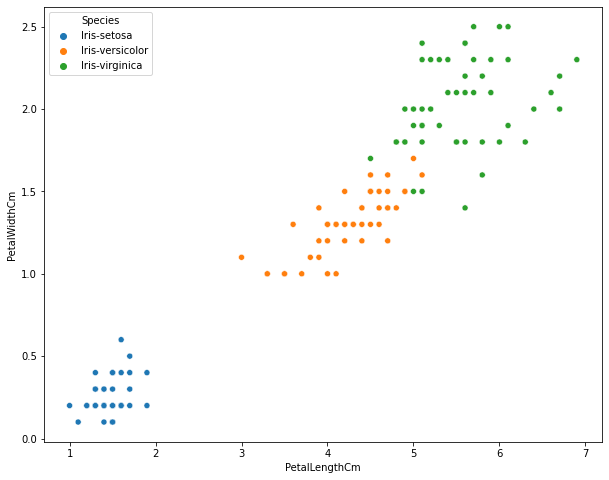

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = dataset)

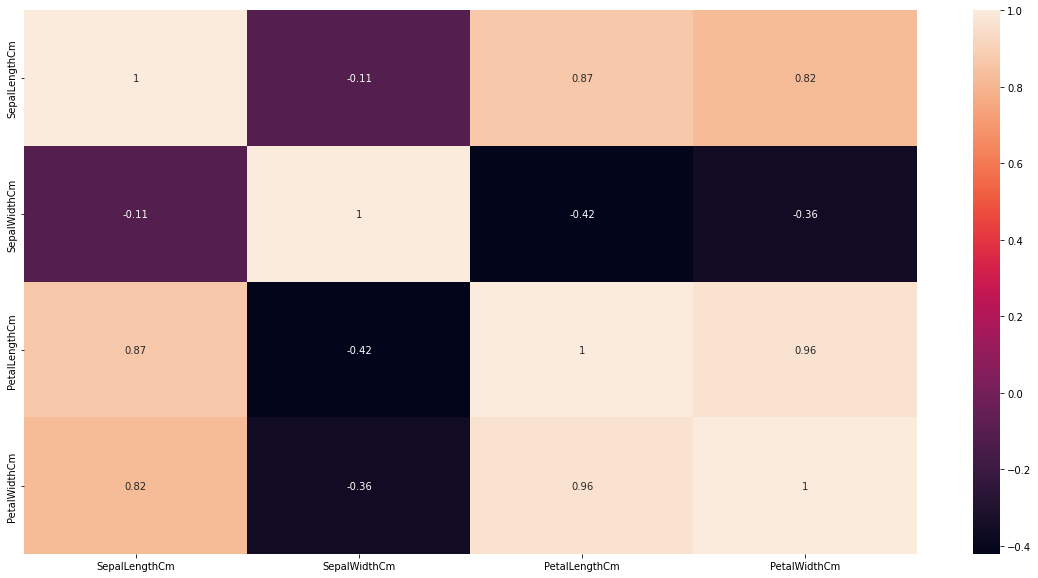

In [ ]:
plt.figure(figsize=(20,10)) 
sns.heatmap(dataset.corr(), annot=True) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


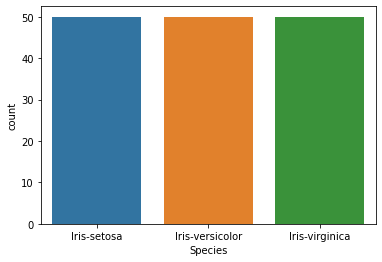

In [ ]:
sns.countplot(dataset['Species'], label = "Count")

In [ ]:
import plotly
import plotly.express as px

fig = px.scatter_3d(dataset[['SepalLengthCm','SepalWidthCm'	,'PetalLengthCm'	,'PetalWidthCm',"Species"]],
                    x = 'SepalLengthCm',
                    y = 'SepalWidthCm',
                    z = 'PetalLengthCm',
                    size = 'PetalWidthCm',
                    color = 'Species',
                    opacity = 0.7)

fig.update_layout(margin = dict(l=0, r=0, b=0, t=0))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score,hamming_loss
import time
data_feature_names = ['SepalLengthCm','SepalWidthCm'	,'PetalLengthCm'	,'PetalWidthCm']

dataset['Species'].replace(to_replace=['Setosa', 'Virginica', 'Versicolor'], 
                           value=[1, 2, 3], inplace=True)

X = dataset.drop('Species', axis=1)
y = dataset.Species
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
def rate_model(y_test, pred, mode):
  WPS = precision_score(y_test, pred, average = mode)
  print('Weighted precision score: {:.4f}'.format(WPS))
  WRS = recall_score(y_test, pred, average=mode)
  print('Weighted recall score: {:.4f}'.format(WRS))
  F1 = f1_score(y_test, pred, average=mode)
  print('Weighted F1 score: {:.4f}'.format(F1))
  print(f"Hamming Loss: {hamming_loss(y_test,pred):.4f}")

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
t = time.time();
model.fit(X_train, y_train)
t1= time.time();
pred=model.predict(X_test)
print(f'Training time: {t1-t:.5f}s')
print(f'Accuracy: {accuracy_score(y_test, pred)*100:.2f}%')
rate_model(y_test,pred,'weighted')

Training time: 0.00355s
Accuracy: 95.56%
Weighted precision score: 0.9619
Weighted recall score: 0.9556
Weighted F1 score: 0.9559
Hamming Loss: 0.0444


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
t = time.time();
model.fit(X_train, y_train)
t1= time.time();
pred=model.predict(X_test)
print(f'Training time: {t1-t:.5f}s')
print(f'Accuracy: {accuracy_score(pred, y_test)*100:.2f}%')
rate_model(y_test,pred,'weighted')

Training time: 0.02203s
Accuracy: 95.56%
Weighted precision score: 0.9619
Weighted recall score: 0.9556
Weighted F1 score: 0.9559
Hamming Loss: 0.0444


Training time: 0.00222s
Accuracy: 95.56%
Weighted precision score: 0.9619
Weighted recall score: 0.9556
Weighted F1 score: 0.9559
Hamming Loss: 0.0444


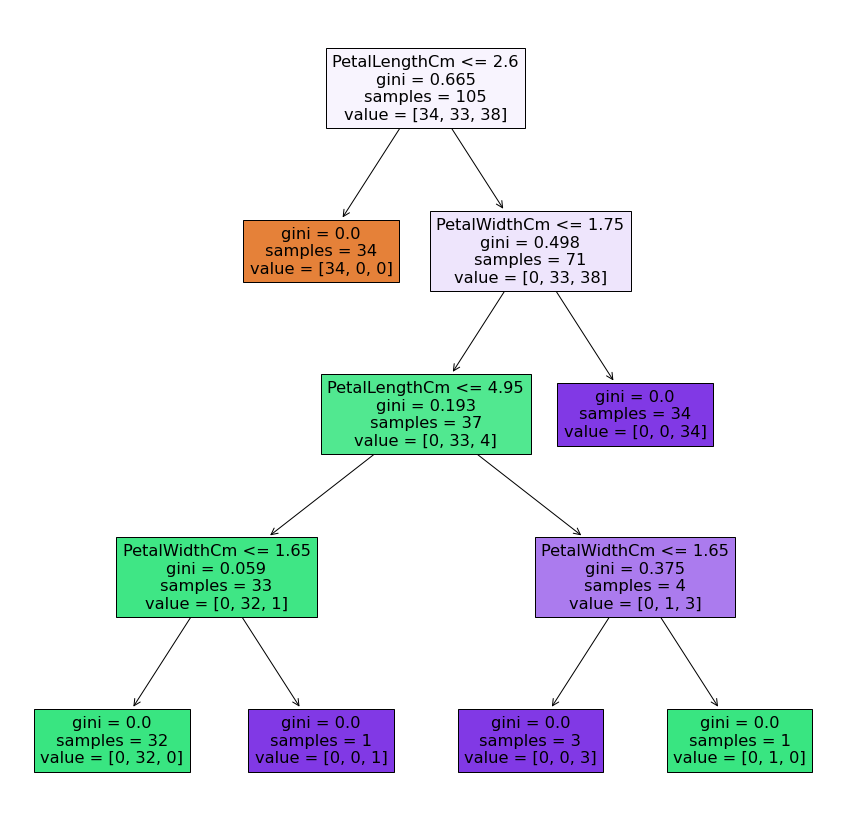

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model=DecisionTreeClassifier()
t = time.time();
model.fit(X_train, y_train)
t1= time.time();
pred=model.predict(X_test)
print(f'Training time: {t1-t:.5f}s')
print(f'Accuracy: {accuracy_score(pred, y_test)*100:.2f}%')
rate_model(y_test,pred, 'weighted')
fig = plt.figure(figsize = (15,15))
_ = plot_tree(model,feature_names = data_feature_names, filled = True)

In [ ]:
model = SVC(kernel='rbf', gamma=0.5, C=0.1)
t = time.time();
model.fit(X_train, y_train)
t1= time.time();
pred=model.predict(X_test)
print(f'Training time: {t1-t:.5f}s')
print(f'Accuracy: {accuracy_score(pred, y_test)*100:.2f}%')
rate_model(y_test,pred,'weighted')

Training time: 0.00546s
Accuracy: 93.33%
Weighted precision score: 0.9467
Weighted recall score: 0.9333
Weighted F1 score: 0.9338
Hamming Loss: 0.0667


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)
best_params = grid.best_params_
print(f"Best params: {best_params}")
svm_clf = SVC(**best_params)
t = time.time();
svm_clf.fit(X_train, y_train)
t1= time.time();
pred = svm_clf.predict(X_test)
print(f'Training time: {t1-t:.5f}s')
print(f'Accuracy: {accuracy_score(pred, y_test)*100:.2f}%')

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best params: {'C': 0.5, 'gamma': 1, 'kernel': 'linear'}
Training time: 0.00292s
Accuracy: 95.56%
